# Convolution Layer

Let's see how CNN actually does it's magic!

CNN is short for Convolutional Neural Network, and convolution process as well as mathematical formula is the primary factor. Now, before we go deeper into the math, let's check out how the convolution process works.



## Convolution Process

The convolution process refers to the action of mapping a filter called kernel across the image and performing a convolution mathematical operations to produce a feature map. It's easier to show an animation of this:

![Illustration of Convolution Operation](https://storage.googleapis.com/rg-ai-bootcamp/cnn/illustration-convolution-operation.gif) [Source: Miro](https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

In the animation above, we can see an image of 5x5 being convoluted with a 3x3 kernel resulting in a 3x3 feature map.

## Convolution Operation

The convolution operation of two arrays $a$ and $b$ is denoted by $a * b$ and defined as:

$$
(a * b)_{n} = \sum_{i=1} a_{i} b_{n-i}
$$

Let's see how this works in practice. Let's say we have an $A$ is $[1, 2, 3, 4, 5]$ and $B$ is $[10, 9, 8]$. The convolution operation of $A$ and $B$ is:

$$
\begin{align}
(a * b)_{2} &= \sum_{i=1} a_{i} b_{2-i} \\
&= a_{1} b_{1}
\end{align}
$$

$$
\begin{align}
(a * b)_{3} &= \sum_{i=1} a_{i} b_{3-i} \\
&= a_{1} b_{2} + a_{2} b_{1}
\end{align}
$$

$$
\begin{align}
(a * b)_{4} &= \sum_{i=1} a_{i} b_{4-i} \\
&= a_{1} b_{3} + a_{2} b_{2} + a_{3} b_{1}
\end{align}
$$

Confusing? Let's watch the following [video](https://youtu.be/KuXjwB4LzSA?si=a_AptEIq6KxdUnwC&t=388), it's actually pretty simple.

## Convolution Operation in Python

In Python, we can use `numpy.convolve` to perform the convolution operation.

In [ ]:
import numpy as np

a = [1, 2, 3]
b = [4, 5, 6]

print(np.convolve(a, b, 'full'))

[ 4 13 28 27 18]


`same` parameter will make sure the output has the same length as the input.

In [ ]:
import numpy as np

a = [1, 2, 3]
b = [4, 5, 6]

print(np.convolve(a, b, 'same'))

[13 28 27]


`valid` parameter will make sure the calculation is only performed where the input and the filter fully overlap.

In [ ]:
import numpy as np

a = [1, 2, 3]
b = [4, 5, 6]

print(np.convolve(a, b, 'valid'))

[28]


In the above example, the output is only calculated for $1 * 6 + 2 * 5 + 3 * 4 = 28$.

In [ ]:
import numpy as np

a = [1, 2, 3]
b = [4, 5, 6, 7]

print(np.convolve(a, b, 'valid'))

[28 34]


How about 2D?

It's possible to use numpy to perform 2D convolution operation, but it's not as simple as 1D. We'll use `scipy.signal.convolve2d` instead.

In [1]:
import numpy as np
from scipy.signal import convolve2d

# Given arrays
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 0], [1, 0]])

# 'valid' means that we only compute the convolution where the input arrays fully overlap
c = convolve2d(a, b, mode='valid')

print(c)

[[ 7  9]
 [13 15]]


## Feature Extraction

But that still doesn't answer how does this process help detect edges ?

> Note: To better illustrate, we prepare a spreadsheet for a quick simulation of Convolution:
[GSheet Link](https://docs.google.com/spreadsheets/d/1qtgRuDqBKpzWayQM24mbRxjUEKciAtHHU1iztVYFAbQ/edit?usp=sharing)
>
> So you can try it for yourself, it's much easier using Google Sheet. Remember to make a copy for your own use.

Now, let's put this knowledge into action:

Let's say we have a 16x16 grid containing a letter H. And we have a 3x3 kernel with the identity, meaning the only activated is the center number.

```
0 0 0
0 1 0
0 0 0
```

In [ ]:
!pip install matplotlib numpy scipy

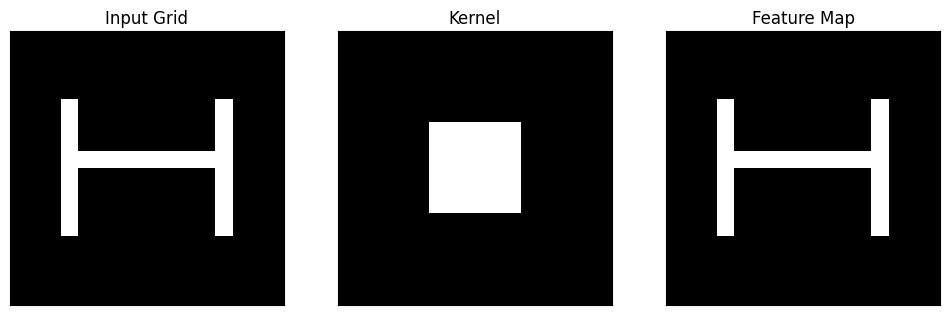

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

def simulate_convolution(input_grid, kernel):
    # Get the size of the input grid
    grid_size = input_grid.shape[0]

    # Perform convolution
    feature_map = convolve2d(input_grid, kernel, 'same')

    # Create a figure and subplots
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # Plot the input grid on the left
    axs[0].imshow(input_grid, cmap='gray')
    axs[0].set_title('Input Grid')

    # Plot the kernel in the middle
    axs[1].imshow(kernel, cmap='gray')
    axs[1].set_title('Kernel')

    # Plot the feature map on the right
    axs[2].imshow(feature_map, cmap='gray')
    axs[2].set_title('Feature Map')

    # Remove axis labels and ticks
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
    # Show the grids
    plt.show()

    print("input_grid", input_grid, sep='\n')
    print("kernel", kernel, sep='\n')
    print("feature_map", feature_map, sep='\n')

# Create a 16x16 input grid with the letter "H"
grid_size = 16
input_grid = np.zeros((grid_size, grid_size))

# Draw the letter "H" on the input grid
# Horizontal line
input_grid[7, 3:12] = 1
# Vertical lines
input_grid[4:12, 3] = 1
input_grid[4:12, 12] = 1

# Create a 3x3 identity kernel
conv_kernel = np.array([[0, 0, 0],
                       [0, 1, 0],
                       [0, 0, 0]])

# Call the function to simulate convolution
simulate_convolution(input_grid, conv_kernel)


The result on the right is the same letter, what happens if we change the kernel to:
```
0.00	0.20	0.00
0.20	0.20	0.20
0.00	0.20	0.00
```

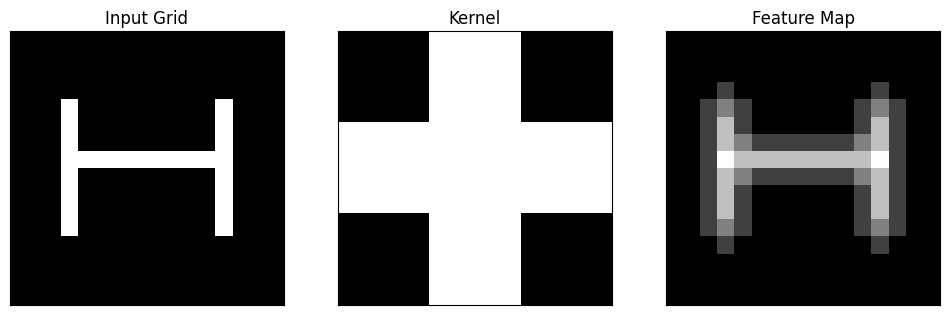

input_grid
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
kernel
[[0.  0.2 0. ]
 [0.2 0.2 0.2]
 [0.  0.2 0. ]]
feature_map
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [ ]:
# Create a 3x3 blur kernel
conv_kernel = np.array([[0, 0.2, 0],
                        [0.2, 0.2, 0.2],
                        [0, 0.2, 0]])

# Call the function to simulate convolution
simulate_convolution(input_grid, conv_kernel)

The image is blurred right ? Now, as we change the kernel, the feature map will change accordingly.

Can we use the kernel to detect horizontal line and vertical line ?

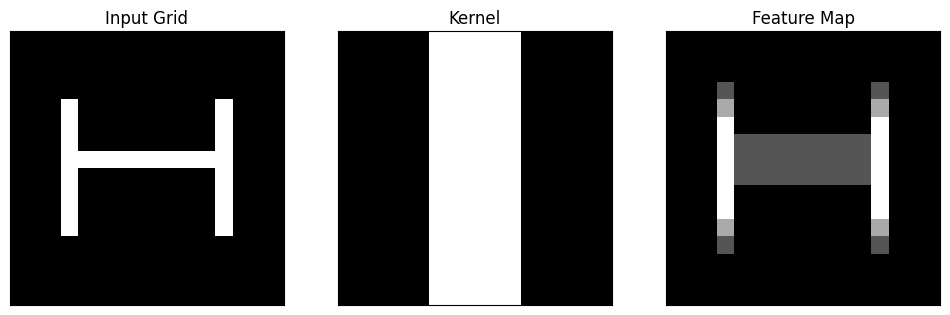

input_grid
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
kernel
[[0 1 0]
 [0 1 0]
 [0 1 0]]
feature_map
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 

In [ ]:
# Create a 3x3 vertical line detection kernel
conv_kernel = np.array([[0, 1, 0],
                        [0, 1, 0],
                        [0, 1, 0]])

# Call the function to simulate convolution
simulate_convolution(input_grid, conv_kernel)

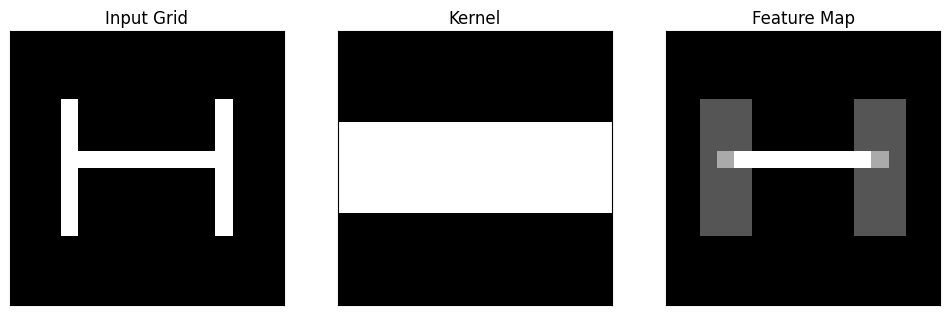

input_grid
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
kernel
[[0 0 0]
 [1 1 1]
 [0 0 0]]
feature_map
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 

In [ ]:
# Create a 3x3 vertical line detection kernel
conv_kernel = np.array([[0, 0, 0],
                        [1, 1, 1],
                        [0, 0, 0]])

# Call the function to simulate convolution
simulate_convolution(input_grid, conv_kernel)

Yes we can!

## Convolution Demo

Again, we prepare a spreadsheet for a quick simulation of Convolution:
[GSheet Link](https://docs.google.com/spreadsheets/d/1qtgRuDqBKpzWayQM24mbRxjUEKciAtHHU1iztVYFAbQ/edit?usp=sharing)

So you can try it for yourself, it's much easier using Google Sheet. Remember to make a copy for your own use.

## Convolution Layer

The input data to a convolutional layer is usually in 3-dimensions: **height**, **width** and **depth**. Height and weight clearly refers to the dimension of the image. But what about depth ? Depth here simply refers to the image channels, in the case of RGB it has a depth of 3, for grayscale image it has a depth of 1.

## Kernel

The convolution layer then takes the input and apply the kernel to an area of the image and a dot product is calculated between the input pixels and the kernel. The kernel size is usually 3x3 but it can be adjusted. A larger kernel naturally covers a larger area and better detect large shapes or objects but less adapt to detecting the finer details such as edges, corners or textures which are better performed with a small kernel.

![Convolution Animation](https://storage.googleapis.com/rg-ai-bootcamp/cnn/convolution-animation.gif)

Source: [Hochschule Der Medien](https://hannibunny.github.io/mlbook/neuralnetworks/convolutionDemos.html)

Then how can we create a kernel matrix? Is it by hand or is there a way to create it automatically?

Well, it turns out we can define the kernel size, but the kernel matrix itself is learned by the CNN Neural Network. Here's how it works:

- Initially the values within the kernel matrix are randomly initialized. These random values do not represent any specific pattern.
- During the training process of the CNN, the network learns the optimal values for the kernel matrix by adjusting the values within the kernel to minimize the error.
- Once training is complete, the learned kernel matrix is then used for feature extraction during the convolution operation.

## Strides

We know that the kernel moves across the image, but how it moves and steps from one position to another is determined by a parameter known as "strides."

Strides dictate the amount by which the kernel shifts its position as it scans the input data. Specifically, strides control both the horizontal and vertical movement of the kernel during the convolution operation.

Larger stepsizes yield a correspondingly smaller output. In the picture below filtering with stepsize of $ s = 2 $ is shown below filtering the same input with a stepsize of $ s = 1 $.

![Convolution Step Size](https://storage.googleapis.com/rg-ai-bootcamp/cnn/conv-step-size-small.png)

## Padding

Padding is usually applied on the input image by adding additional rows and columns around its border before convolution starts.

The objective is to ensure that the convolution operation considers the pixels at the borders of the input image, preventing information loss and border effects.

The most commonly used padding is zero-padding because of its performance, simplicity, and computational efficiency. The technique involves adding zeros symmetrically around the edges of an input.

In [ ]:
# using numpy to create 5x5 matrix, with random values

import numpy as np

# init random seed
np.random.seed(0)

a = np.random.rand(5, 5)
# print a nicely
np.set_printoptions(precision=3, suppress=True)
print("Original matrix")
print(a)
print()


# add 0 to the left and right of the matrix
b = np.pad(a, pad_width=1, mode='constant', constant_values=0)
print("After padding, p = 1")
print(b)

# we can also pad more than one row or column
c = np.pad(a, pad_width=2, mode='constant', constant_values=0)
print("After padding, p = 2")
print(c)

Original matrix
[[0.549 0.715 0.603 0.545 0.424]
 [0.646 0.438 0.892 0.964 0.383]
 [0.792 0.529 0.568 0.926 0.071]
 [0.087 0.02  0.833 0.778 0.87 ]
 [0.979 0.799 0.461 0.781 0.118]]

After padding
[[0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.549 0.715 0.603 0.545 0.424 0.   ]
 [0.    0.646 0.438 0.892 0.964 0.383 0.   ]
 [0.    0.792 0.529 0.568 0.926 0.071 0.   ]
 [0.    0.087 0.02  0.833 0.778 0.87  0.   ]
 [0.    0.979 0.799 0.461 0.781 0.118 0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]
After padding
[[0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.549 0.715 0.603 0.545 0.424 0.    0.   ]
 [0.    0.    0.646 0.438 0.892 0.964 0.383 0.    0.   ]
 [0.    0.    0.792 0.529 0.568 0.926 0.071 0.    0.   ]
 [0.    0.    0.087 0.02  0.833 0.778 0.87  0.    0.   ]
 [0.    0.    0.979 0.799 0.461 0.781 0.118 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0. 

## ACTIVATION FUNCTION

We perform an Activation function after every convolutional layer in the network architecture.

The ReLU activation function is specifically used as a non-linear activation function, as opposed to other non-linear functions such as Sigmoid because it has been empirically observed that CNNs using ReLU are faster to train than their counterparts

## How to create kernel matrix?

Then how can we create a kernel matrix? Is it by hand or is there a way to create it automatically?

Well, it turns out we can define the kernel size, but the kernel matrix itself is learned by the CNN Neural Network. Here's how it works:

- Initially the values within the kernel matrix are randomly initialized. These random values do not represent any specific pattern.
- During the training process of the CNN, the network learns the optimal values for the kernel matrix by adjusting the values within the kernel to minimize the error.
- Once training is complete, the learned kernel matrix is then used for feature extraction during the convolution operation.

## Size of the output

The size of the output feature map is controlled by **stride** and **padding**.

$$
W_{out} = \frac{W_{in} - F + 2P}{S} + 1
$$
